In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pyspark import SparkContext, SparkConf
import sys
import csv
from itertools import islice, combinations
import time
import random
import itertools
import json
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np

if __name__ == '__main__':
  start_time = time.time()
  conf = SparkConf().setAppName('531_final_proj').setMaster('local[*]')
  sc = SparkContext.getOrCreate(conf=conf)
  sc.setSystemProperty('spark.driver.memory', '4g')
  sc.setSystemProperty('spark.executor.memory', '4g')
  sc.setLogLevel("ERROR")

In [11]:
# Load dataset
lines = sc.textFile('/content/drive/My Drive/Data/patients_data.csv')

header = lines.first()
# Filter out the header row and convert each remaining line into a list of values
rdd = lines.filter(lambda row: row != header).map(lambda row: row.split(','))

## GENDER BAR CHART

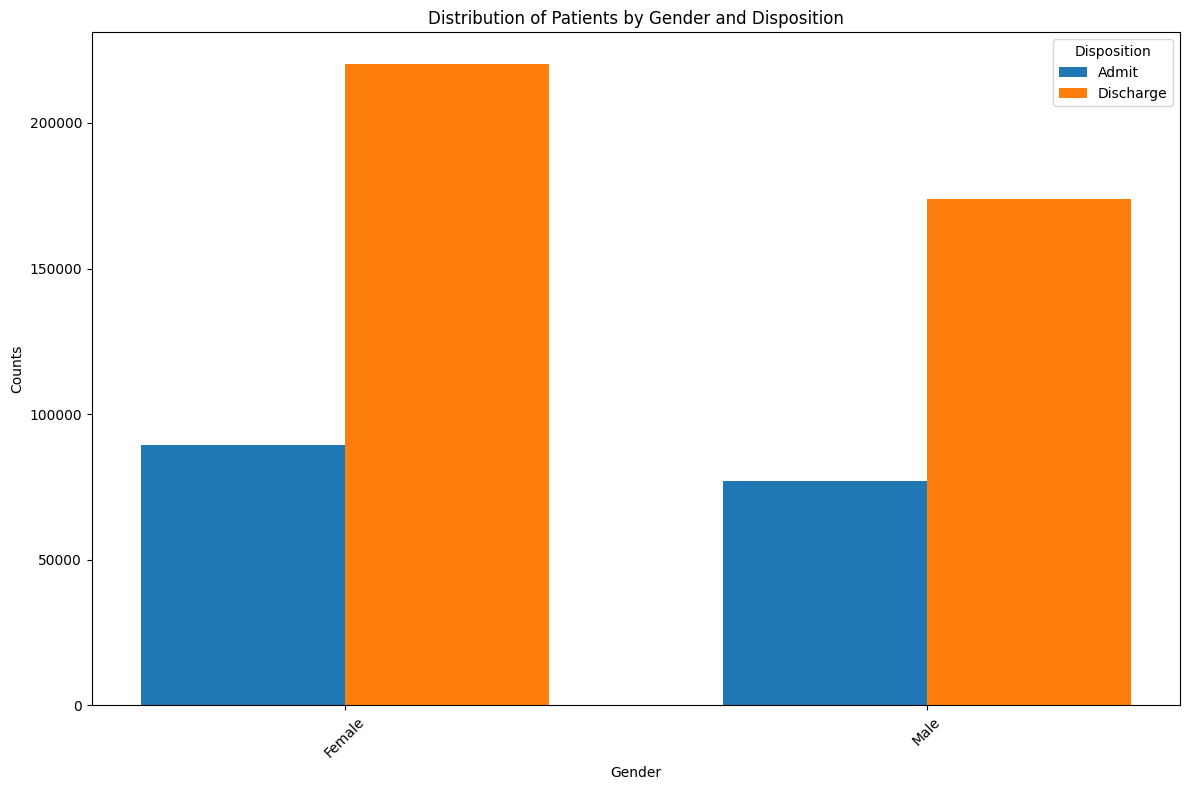

In [12]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Count and group data by gender and disposition, then collect the results
data = rdd.map(lambda x: ((x[4], x[12]), 1)).reduceByKey(lambda a, b: a + b).map(lambda x: (x[0][0], (x[0][1], x[1]))).groupByKey().mapValues(list).collect()

# Put data in dictionary for plotting
plot_data = defaultdict(lambda: defaultdict(int))
for gender, counts in data:
    for disposition, count in counts:
        plot_data[gender][disposition] += count

# Generate the plot
fig, ax = plt.subplots(figsize=(12, 8))
labels = sorted(plot_data.keys())
width = 0.35
num_dispositions = len(set(k for v in plot_data.values() for k in v))
index = range(len(labels))

# Plot each disposition side by side
for i, disposition in enumerate(sorted(set(k for v in plot_data.values() for k in v))):
    disposition_counts = [plot_data[label].get(disposition, 0) for label in labels]
    ax.bar([x + (i * width) for x in index], disposition_counts, width, label=disposition)

ax.set_xlabel('Gender')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Patients by Gender and Disposition')
ax.legend(title='Disposition')
ax.set_xticks([i + width*(num_dispositions-1)/2 for i in index])
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## RACE BAR CHART

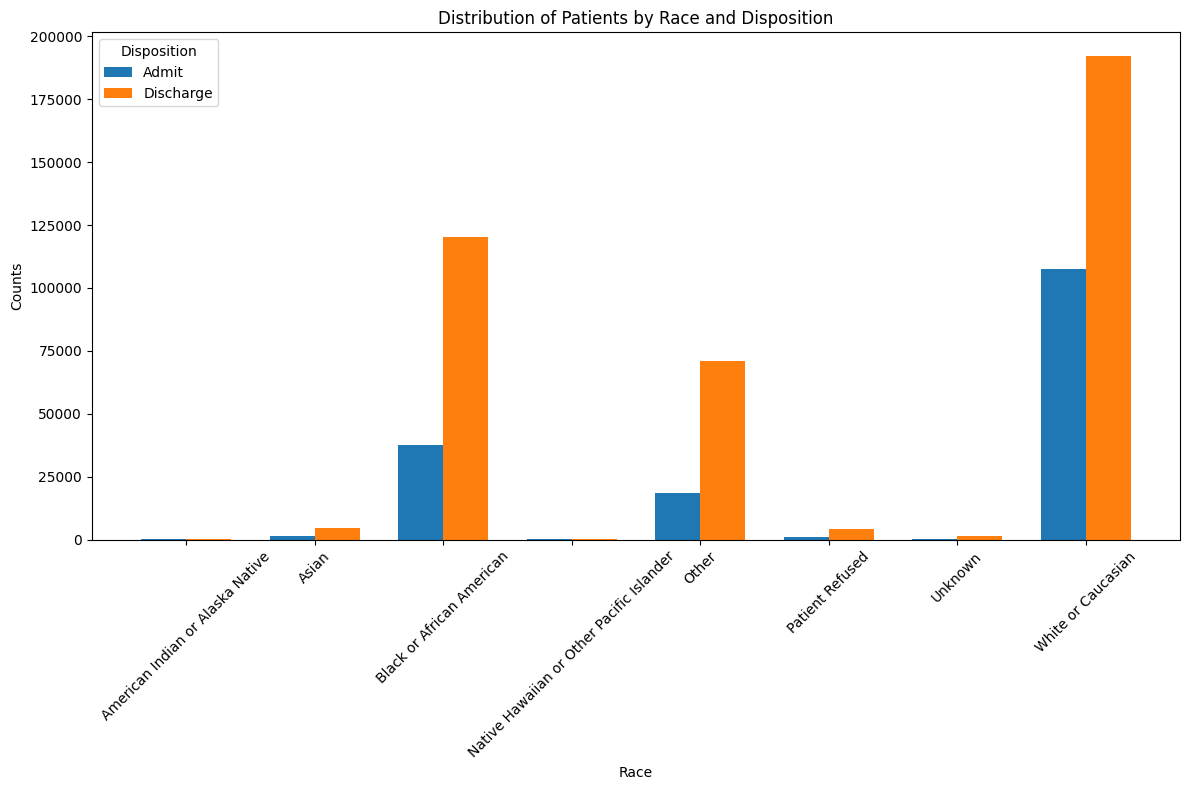

In [13]:
# Remove unlableled instances
rdd_filtered = rdd.filter(lambda x: x[6] != '')

# Count and group data by race and disposition, then collect the results
data = rdd_filtered.map(lambda x: ((x[6], x[12]), 1)).reduceByKey(lambda a, b: a + b).map(lambda x: (x[0][0], (x[0][1], x[1]))).groupByKey().mapValues(list).collect()

# Put data in dictionary for plotting
plot_data = defaultdict(lambda: defaultdict(int))
for race, counts in data:
    for disposition, count in counts:
        plot_data[race][disposition] += count

# Generate the plot
fig, ax = plt.subplots(figsize=(12, 8))
labels = sorted(plot_data.keys())
width = 0.35
num_dispositions = len(set(k for v in plot_data.values() for k in v))
index = range(len(labels))

# Plot each disposition side by side
for i, disposition in enumerate(sorted(set(k for v in plot_data.values() for k in v))):
    disposition_counts = [plot_data[label].get(disposition, 0) for label in labels]
    ax.bar([x + (i * width) for x in index], disposition_counts, width, label=disposition)

ax.set_xlabel('Race')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Patients by Race and Disposition')
ax.legend(title='Disposition')
ax.set_xticks([i + width*(num_dispositions-1)/2 for i in index])
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## INSURANCE STATUS

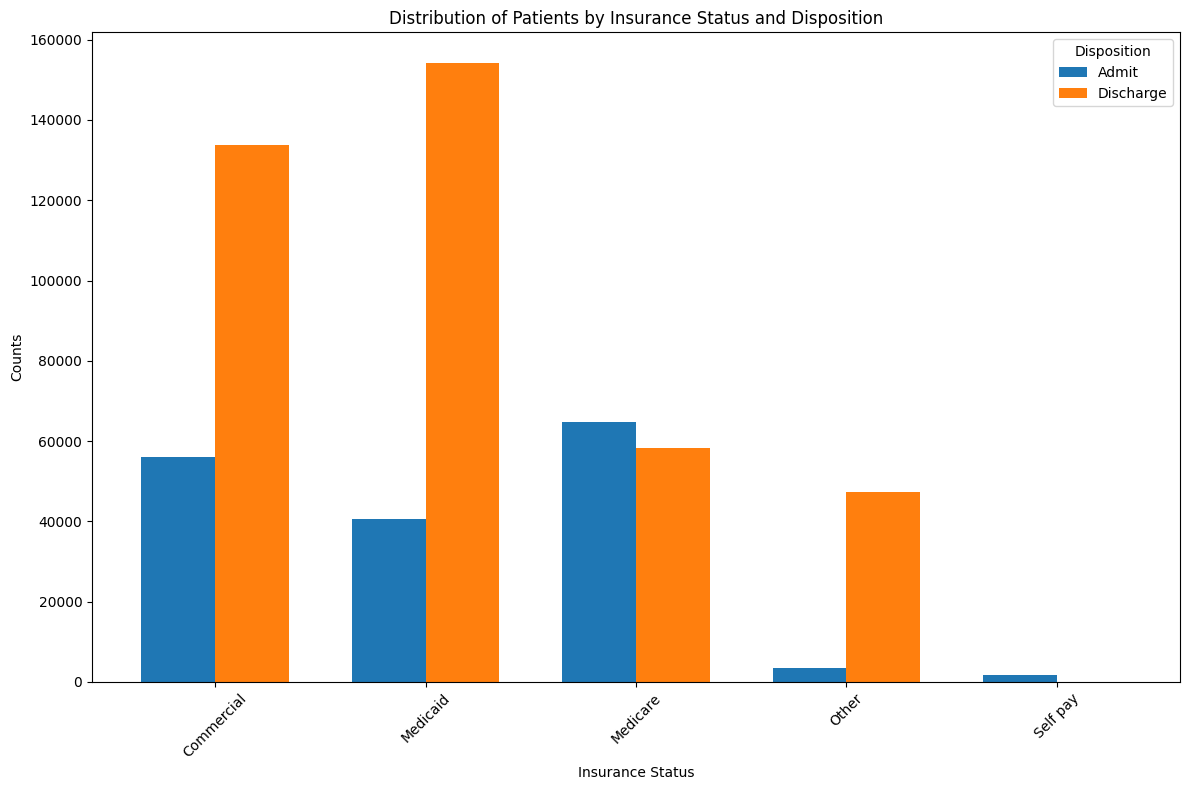

In [14]:
# Count and group data by race and disposition, then collect the results
data = rdd.map(lambda x: ((x[11], x[12]), 1)).reduceByKey(lambda a, b: a + b).map(lambda x: (x[0][0], (x[0][1], x[1]))).groupByKey().mapValues(list).collect()

# Put data in dictionary for plotting
plot_data = defaultdict(lambda: defaultdict(int))
for insurance, counts in data:
    for disposition, count in counts:
        plot_data[insurance][disposition] += count

# Generate the plot
fig, ax = plt.subplots(figsize=(12, 8))
labels = sorted(plot_data.keys())
width = 0.35
num_dispositions = len(set(k for v in plot_data.values() for k in v))
index = range(len(labels))

# Plot each disposition side by side
for i, disposition in enumerate(sorted(set(k for v in plot_data.values() for k in v))):
    disposition_counts = [plot_data[label].get(disposition, 0) for label in labels]
    ax.bar([x + (i * width) for x in index], disposition_counts, width, label=disposition)

ax.set_xlabel('Insurance Status')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Patients by Insurance Status and Disposition')
ax.legend(title='Disposition')
ax.set_xticks([i + width*(num_dispositions-1)/2 for i in index])
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()